<a href="https://colab.research.google.com/github/gabriel7268/Notebooks/blob/Python-Week/Semana_do_Python_Aula_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Automação Web e Busca de Informações com Python

#Desafio:  
Importadora que compra produtos em dolar, euro e ouro.

#Atividade:  
Pegar na internet, de forma automática, a cotação das moedas e atualizar a base de dados.

#Usaremos:  
Selenium  
Webdriver




!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.python.org")

from selenium.webdriver.common.keys import Keys

print('Setup de carregamento concluído!')

# Tentativa 1 de Uso do Selenium no Colab 

In [ ]:
!pip install selenium chromium-chromedriver
!cp /usr/lib
!apt-get update # to update ubuntu to correctly run apt install
!apt install/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.python.org")

from selenium.webdriver.common.keys import Keys

print('Setup de carregamento concluído!')

# Tentativa 2



In [ ]:
# I create my own library to make it even easier
!pip install kora -q
from kora.selenium import wd
wd.get("https://www.python.org")
#print(wd.page_source)  # results
wd
from selenium.webdriver.common.keys import Keys

In [ ]:
divs = wd.select("div") # css selecter
div = divs[0]
wd   # screenshot

# Tentativa 3 (Melhor)

In [ ]:
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
from selenium.webdriver.common.keys import Keys

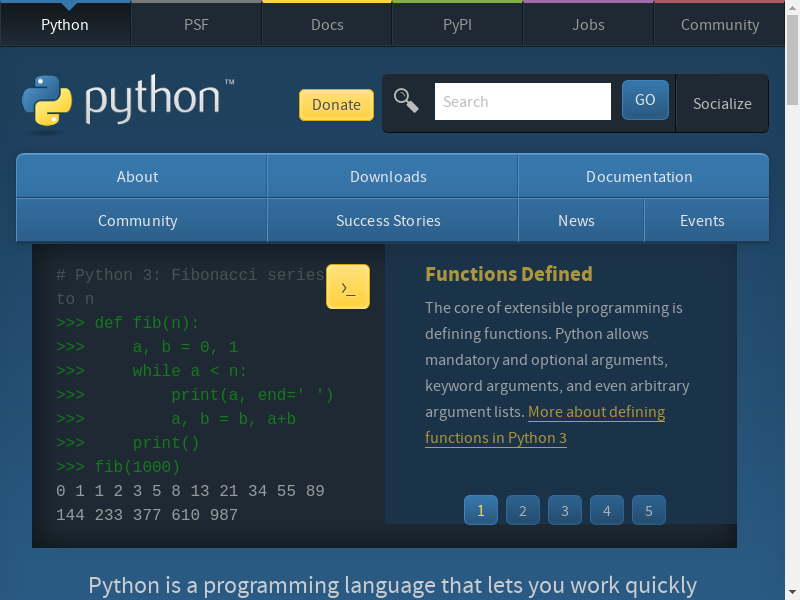

In [ ]:
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://www.python.org")
wd #screenshot

# Web Scrapping

In [ ]:
# open it, go to a website
nav = webdriver.Chrome(options=options)
nav.get("https://www.google.com.br")

# search dollar cotation (cotacao dolar/PT-BR)
nav.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input').send_keys("cotação dólar")
nav.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input').send_keys(Keys.ENTER)
cotacao_dolar = nav.find_element_by_xpath('//*[@id="knowledge-currency__updatable-data-column"]/div[3]/table/tbody/tr[3]/td[1]/input').get_attribute('data-value')
print(cotacao_dolar)

# search euro cotation (cotacao euro/PT-BR)
nav.get("https://www.google.com.br/")
nav.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input').send_keys("cotação euro")
nav.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input').send_keys(Keys.ENTER)
cotacao_euro = nav.find_element_by_xpath('//*[@id="knowledge-currency__updatable-data-column"]/div[1]/div[2]/span[1]').get_attribute('data-value')
print(cotacao_euro)

# search gold cotation (cotacao ouro/PT-BR)
nav.get("https://www.melhorcambio.com/")
aba_original = nav.window_handles[0]
nav.find_element_by_xpath('//*[@id="commodity-hoje"]/tbody/tr[2]/td[2]/a/img').click()
aba_nova = nav.window_handles[1]
nav.switch_to.window(aba_nova)
cotacao_ouro = nav.find_element_by_id('comercial').get_attribute('value')
cotacao_ouro = cotacao_ouro.replace(",", ".")
print(cotacao_ouro)

nav.quit()

None
1.201995
309.14


# Import dataset

In [ ]:
# import dataset
import pandas as pd

produtos_df = pd.read_excel("Produtos.xlsx")
display(produtos_df)

# Update products value

In [ ]:
produtos_df.loc[produtos_df['Moeda']=="Dólar", "Cotação"] = float(cotacao_dolar)
produtos_df.loc[produtos_df['Moeda']=="Euro", "Cotação"] = float(cotacao_euro)
produtos_df.loc[produtos_df['Moeda']=="Ouro", "Cotação"] = float(cotacao_ouro)

produtos_df['Preço Base Reais'] = produtos_df['Cotação'] * produtos_df['Preço Base Original']
produtos_df['Preço Final'] = produtos_df['Ajuste'] * produtos_df['Preço Base Reais']
# produtos_df["Preço Final"] = produtos_df["Preço Final"].map("{:.2f}".format)
display(produtos_df)

In [ ]:
produtos_df.to_excel("Produtos Atualizado.xlsx", index=False)